In [53]:
# Install all the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PooledOLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
from linearmodels.panel import PanelOLS, RandomEffects
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey


In [54]:
#Import the file for analysis
excel_file1='Final_For ELI & analysis2.xlsx'
csv_file1='for_eli1.csv'
df1=pd.read_excel(excel_file1)
df1.to_csv(csv_file1, index=False)

In [55]:
# Check the number of rows and type of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryUKSIC2007code    6011 non-null   int64  
 1   Unique code             6011 non-null   int64  
 2   Company_name            6011 non-null   object 
 3   BvDIDnumber             6011 non-null   object 
 4   Index1                  6011 non-null   int64  
 5   ccc                     5941 non-null   float64
 6   No. of employees        6011 non-null   int64  
 7   Turnover                6011 non-null   float64
 8   Average inventory       6011 non-null   float64
 9   Firmsize                6011 non-null   float64
 10  log_Tasset              6011 non-null   float64
 11  ROA                     6011 non-null   float64
 12  ROS                     6011 non-null   float64
 13  Profit                  6011 non-null   float64
 14  Inventory_turnover      6011 non-null   

In [56]:
# Descriptive statistics of the data
df1.describe()

,PrimaryUKSIC2007code,Unique code,Index1,ccc,No. of employees,Turnover,Average inventory,Firmsize,log_Tasset,ROA,...,Inventory_to_saleratio,Financial_leverage,Liquidity,Capital_intensity,Firm_growth,Short_term_financing,Asset_tangibility,Firm_age_,Average_fixed_assets,log_fasset
count,6011.000000,6.011000e+03,6011.000000,5941.000000,6011.000000,6.011000e+03,6.011000e+03,6.011000e+03,6011.000000,6011.000000,...,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6.011000e+03,6011.000000
mean,21835.321910,2.218500e+07,5.500749,87.268762,808.602229,2.131982e+05,3.956926e+04,3.702343e+05,4.379554,5.382080,...,0.121120,0.261798,1.748246,0.808001,0.064578,0.427383,0.384394,35.171852,2.342587e+05,3.920703
std,8153.497473,1.705788e+08,2.872868,106.722121,5377.975125,1.662658e+06,3.362357e+05,3.544926e+06,0.599165,8.034841,...,0.145782,0.194733,1.297759,0.810378,0.205036,0.181229,0.188969,25.726682,2.401786e+06,0.701197
min,8120.000000,1.100000e+01,1.000000,-79.111117,3.000000,3.391782e+03,1.045720e+02,1.881905e+03,3.274598,-80.870268,...,0.004676,0.000759,0.075631,0.146988,-0.784855,0.031133,0.000731,1.000000,1.366000e+02,2.135451
25%,16100.000000,2.200000e+01,3.000000,41.123182,112.000000,1.603978e+04,1.174202e+03,1.020178e+04,4.008676,1.682199,...,0.053838,0.114256,1.096934,0.488921,-0.025924,0.297980,0.238107,17.000000,3.273000e+03,3.514946
50%,22290.000000,5.200000e+01,6.000000,70.275435,179.000000,2.582000e+04,2.564000e+03,1.708300e+04,4.232564,4.796452,...,0.093647,0.226090,1.440554,0.636324,0.049540,0.411233,0.373406,29.000000,6.212008e+03,3.793232
75%,28220.000000,7.200000e+01,8.000000,105.156783,309.000000,5.171080e+04,5.460364e+03,3.486525e+04,4.542393,8.834691,...,0.148332,0.372368,1.991514,0.869706,0.135355,0.547365,0.513404,44.000000,1.423181e+04,4.153260
max,46900.000000,1.333537e+09,10.000000,1989.505993,101192.000000,3.411400e+07,5.971500e+06,8.043100e+07,7.905423,63.773807,...,2.310598,1.958235,23.718448,14.802047,4.093515,1.366549,0.946401,138.000000,4.211530e+07,7.624440


In [57]:
# Correlation analysis
df1.corr()

/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_63864/84448133.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,PrimaryUKSIC2007code,Unique code,Index1,ccc,No. of employees,Turnover,Average inventory,Firmsize,log_Tasset,ROA,...,Inventory_to_saleratio,Financial_leverage,Liquidity,Capital_intensity,Firm_growth,Short_term_financing,Asset_tangibility,Firm_age_,Average_fixed_assets,log_fasset
PrimaryUKSIC2007code,1.000000,0.037138,0.000121,0.060141,-0.011235,-0.026555,-0.032664,-0.020037,-0.127455,0.048390,...,0.053088,-0.050120,0.031999,0.027281,0.019371,0.023943,-0.230071,-0.105830,-0.020873,-0.197775
Unique code,0.037138,1.000000,-0.000034,0.000296,-0.018288,-0.015341,-0.014440,-0.013080,-0.069728,0.007537,...,0.008951,0.093079,0.021556,-0.002155,-0.022542,-0.031113,-0.066320,0.028457,-0.012379,-0.121146
Index1,0.000121,-0.000034,1.000000,-0.045916,-0.007317,-0.010590,-0.021104,-0.019273,-0.139138,0.058398,...,-0.064317,0.051834,-0.089319,-0.071999,0.075420,0.093326,0.036680,-0.111949,-0.000025,-0.000243
ccc,0.060141,0.000296,-0.045916,1.000000,0.113794,0.126012,0.245756,0.157520,0.289980,0.030302,...,0.920996,0.030752,0.413358,0.544336,-0.049571,-0.229589,-0.074635,0.027552,0.145734,0.209596
No. of employees,-0.011235,-0.018288,-0.007317,0.113794,1.000000,0.973743,0.870504,0.954688,0.509249,-0.011332,...,0.050608,0.020092,-0.034984,0.140069,-0.013971,-0.073109,0.144045,0.023501,0.963466,0.475346
Turnover,-0.026555,-0.015341,-0.010590,0.126012,0.973743,1.000000,0.925046,0.977461,0.506538,-0.004497,...,0.056723,0.027135,-0.033445,0.138352,-0.010440,-0.069354,0.138954,0.049766,0.965421,0.470260
Average inventory,-0.032664,-0.014440,-0.021104,0.245756,0.870504,0.925046,1.000000,0.905763,0.508208,-0.002231,...,0.171914,0.034412,-0.006497,0.201014,-0.016930,-0.085835,0.132800,0.072359,0.862692,0.469237
Firmsize,-0.020037,-0.013080,-0.019273,0.157520,0.954688,0.977461,0.905763,1.000000,0.482980,-0.004249,...,0.085140,0.027667,-0.019880,0.178361,-0.012505,-0.076267,0.137276,0.032538,0.966311,0.447125
log_Tasset,-0.127455,-0.069728,-0.139138,0.289980,0.509249,0.506538,0.508208,0.482980,1.000000,-0.088994,...,0.252714,0.133518,0.140570,0.470213,-0.027273,-0.286422,0.297310,0.232908,0.467379,0.916171
ROA,0.048390,0.007537,0.058398,0.030302,-0.011332,-0.004497,-0.002231,-0.004249,-0.088994,1.000000,...,-0.017593,-0.249216,0.112488,-0.095592,0.167358,-0.090431,-0.158857,-0.003710,0.002586,-0.117276


In [58]:
# Descriptive statistics of the required columns
check_descriptive = ['ROA','ROS','Inventory_turnover','Inventory_to_saleratio','ccc','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
df1[check_descriptive].describe()

,ROA,ROS,Inventory_turnover,Inventory_to_saleratio,ccc,log_Tasset,Firm_growth,Financial_leverage,Liquidity,Capital_intensity,Short_term_financing,Asset_tangibility,Firm_age_
count,6011.000000,6011.000000,6011.000000,6011.000000,5941.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000
mean,5.382080,5.118106,12.472601,0.121120,87.268762,4.379554,0.064578,0.261798,1.748246,0.808001,0.427383,0.384394,35.171852
std,8.034841,7.376124,14.724523,0.145782,106.722121,0.599165,0.205036,0.194733,1.297759,0.810378,0.181229,0.188969,25.726682
min,-80.870268,-69.392284,0.181850,0.004676,-79.111117,3.274598,-0.784855,0.000759,0.075631,0.146988,0.031133,0.000731,1.000000
25%,1.682199,1.896034,4.717131,0.053838,41.123182,4.008676,-0.025924,0.114256,1.096934,0.488921,0.297980,0.238107,17.000000
50%,4.796452,4.307933,7.836578,0.093647,70.275435,4.232564,0.049540,0.226090,1.440554,0.636324,0.411233,0.373406,29.000000
75%,8.834691,7.564467,13.474180,0.148332,105.156783,4.542393,0.135355,0.372368,1.991514,0.869706,0.547365,0.513404,44.000000
max,63.773807,61.872910,165.767768,2.310598,1989.505993,7.905423,4.093515,1.958235,23.718448,14.802047,1.366549,0.946401,138.000000


In [59]:
descriptive_stats = df1[check_descriptive].describe()

# To save this new DataFrame to an Excel file
descriptive_stats.to_excel("descriptive_stats.xlsx")

In [60]:
#Check the columns names
df1.columns

Index(['PrimaryUKSIC2007code', 'Unique code', 'Company_name', 'BvDIDnumber',
       'Index1', 'ccc', 'No. of employees', 'Turnover', 'Average inventory',
       'Firmsize', 'log_Tasset', 'ROA', 'ROS', 'Profit', 'Inventory_turnover',
       'Inventory_to_saleratio', 'Financial_leverage', 'Liquidity',
       'Capital_intensity', 'Firm_growth', 'Short_term_financing',
       'Asset_tangibility', 'Date of incorporation', 'Firm_age_',
       'Average_fixed_assets', 'log_fasset'],
      dtype='object')

In [61]:
# Correlation analysis 
check_corr = ['ROA','ROS','Inventory_turnover','Inventory_to_saleratio','ccc','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
m1_corr=df1[check_corr].corr()
m1_corr.to_excel("m1_corr.xlsx")
m1_corr

,ROA,ROS,Inventory_turnover,Inventory_to_saleratio,ccc,Firm_growth,Financial_leverage,Liquidity,Capital_intensity,Short_term_financing,Asset_tangibility,Firm_age_
ROA,1.000000,0.597478,-0.034270,-0.017593,0.030302,0.167358,-0.249216,0.112488,-0.095592,-0.090431,-0.158857,-0.003710
ROS,0.597478,1.000000,-0.096270,0.262235,0.357503,0.160255,-0.193069,0.253281,0.144053,-0.266405,-0.008565,0.033640
Inventory_turnover,-0.034270,-0.096270,1.000000,-0.365077,-0.310394,0.037172,0.043538,-0.172950,-0.148230,0.173778,0.087170,-0.061980
Inventory_to_saleratio,-0.017593,0.262235,-0.365077,1.000000,0.920996,-0.070961,0.039800,0.402208,0.414803,-0.191361,-0.084520,0.049811
ccc,0.030302,0.357503,-0.310394,0.920996,1.000000,-0.049571,0.030752,0.413358,0.544336,-0.229589,-0.074635,0.027552
Firm_growth,0.167358,0.160255,0.037172,-0.070961,-0.049571,1.000000,-0.003047,-0.059102,-0.118030,0.066532,-0.023025,-0.075192
Financial_leverage,-0.249216,-0.193069,0.043538,0.039800,0.030752,-0.003047,1.000000,-0.268337,0.158809,0.271576,0.245495,-0.090935
Liquidity,0.112488,0.253281,-0.172950,0.402208,0.413358,-0.059102,-0.268337,1.000000,0.263287,-0.559486,-0.274720,0.088601
Capital_intensity,-0.095592,0.144053,-0.148230,0.414803,0.544336,-0.118030,0.158809,0.263287,1.000000,-0.321197,0.236656,0.100756
Short_term_financing,-0.090431,-0.266405,0.173778,-0.191361,-0.229589,0.066532,0.271576,-0.559486,-0.321197,1.000000,-0.300462,-0.181022


In [62]:
check_corr = ['ROA','ROS','Inventory_to_saleratio','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
m3_corr=df1[check_corr].corr()
m3_corr.to_excel("m3_corr.xlsx")


In [63]:
check_corr = ['ROS','Inventory_to_saleratio','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
m4_corr=df1[check_corr].corr()
m4_corr.to_excel("m4_corr.xlsx")

In [64]:
check_corr = ['ROA','ccc','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
m5_corr=df1[check_corr].corr()
m5_corr.to_excel("m5_corr.xlsx")

In [65]:
check_corr = ['ROS','ccc','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
m6_corr=df1[check_corr].corr()
m6_corr.to_excel("m6_corr.xlsx")

In [66]:
# Winsorise the data to remove outliers 
from scipy.stats.mstats import winsorize

# Name a variable to store the columns to be winsorised
cols_to_winsorize = ['ccc','No. of employees','Turnover', 'Average inventory', 'Firmsize', 
                     'log_Tasset', 'ROA', 'ROS','Profit','Inventory_turnover', 
                     'Inventory_to_saleratio', 'Financial_leverage', 'Liquidity', 
                     'Capital_intensity', 'Firm_growth', 'Short_term_financing',
                     'Asset_tangibility', 'Average_fixed_assets','Firm_age_', 
                     'log_fasset']
#Loop the columns to winsorise
for col in cols_to_winsorize:
    df1[col] = winsorize(df1[col], limits=[0.05, 0.05])

# Print the dataframe to check the result
df1

,PrimaryUKSIC2007code,Unique code,Company_name,BvDIDnumber,Index1,ccc,No. of employees,Turnover,Average inventory,Firmsize,...,Financial_leverage,Liquidity,Capital_intensity,Firm_growth,Short_term_financing,Asset_tangibility,Date of incorporation,Firm_age_,Average_fixed_assets,log_fasset
0,11010,21,DIAGEO PLC,GB00023307,1,208.440201,1457,344214.000,38918.0000,351813.000,...,0.460896,1.602492,1.743787,0.083475,0.223516,0.641818,21/10/1886,92,172286.8000,5.236252
1,11010,21,DIAGEO PLC,GB00023307,2,208.440201,1457,344214.000,38918.0000,351813.000,...,0.503933,1.765856,1.743787,-0.196410,0.195028,0.655608,21/10/1886,92,172286.8000,5.236252
2,11010,21,DIAGEO PLC,GB00023307,3,208.440201,1457,344214.000,38918.0000,351813.000,...,0.401169,1.338426,1.581087,0.046766,0.223767,0.700505,21/10/1886,92,172286.8000,5.236252
3,11010,21,DIAGEO PLC,GB00023307,4,208.440201,1457,344214.000,38918.0000,351813.000,...,0.338449,1.366509,1.588623,0.017555,0.214033,0.707521,21/10/1886,92,172286.8000,5.236252
4,11010,21,DIAGEO PLC,GB00023307,5,208.440201,1457,344214.000,38918.0000,351813.000,...,0.319780,1.299099,1.581208,0.158110,0.230865,0.700083,21/10/1886,92,172286.8000,5.236252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,6,65.436737,118,25328.551,2188.6085,10466.801,...,0.049356,1.973843,0.414362,-0.141636,0.401610,0.207285,40256,8,2106.1912,3.323498
6007,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,7,62.883773,118,29507.950,2471.4505,10523.595,...,0.072644,1.811557,0.377385,-0.191525,0.449404,0.185880,40256,8,2106.1912,3.323498
6008,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,8,54.823271,119,36498.267,2715.7990,11748.096,...,0.134726,1.681820,0.330475,0.026884,0.510204,0.141929,40256,8,2106.1912,3.323498
6009,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,9,58.328332,125,35542.721,2991.3355,12375.407,...,0.190395,1.716791,0.339144,0.032542,0.513190,0.118961,40256,8,2106.1912,3.323498


In [67]:
# Calculate Variance inflation index(VIF) for each variable to get Multicollinearity
vif = pd.DataFrame()
#Store the variables to check for Multicollinearity
exog_vars = ['Inventory_turnover','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']

vif["variables"] = exog_vars
vif["VIF"] = [variance_inflation_factor(df1[exog_vars].values, i) for i in range(df1[exog_vars].shape[1])]

print(vif)


              variables       VIF
0    Inventory_turnover  2.643152
1           Firm_growth  1.226098
2    Financial_leverage  4.619634
3             Liquidity  5.106019
4     Capital_intensity  8.824772
5  Short_term_financing  5.259486
6     Asset_tangibility  7.468591
7             Firm_age_  3.366697


In [68]:
# Calculate VIF for each variable
vif = pd.DataFrame()

exog_vars = ['Inventory_turnover','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Firm_age_']

vif["variables"] = exog_vars
vif["VIF"] = [variance_inflation_factor(df1[exog_vars].values, i) for i in range(df1[exog_vars].shape[1])]

print(vif)

              variables       VIF
0    Inventory_turnover  2.319571
1           Firm_growth  1.201551
2    Financial_leverage  4.347919
3             Liquidity  4.926998
4     Capital_intensity  5.834234
5  Short_term_financing  5.259100
6             Firm_age_  3.259538


In [69]:
# Run PooledOLS regression 

df1.set_index(['BvDIDnumber', 'Index1'], inplace=True)
dependent=df1['ROA']
independent=sm.add_constant(df1[['Inventory_turnover','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Firm_age_']])
model=PooledOLS(dependent, independent)
pooledOLS_res=model.fit()

#Print the results
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    ROA   R-squared:                        0.1666
Estimator:                  PooledOLS   R-squared (Between):              0.2024
No. Observations:                6011   R-squared (Within):               0.1360
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.1666
Time:                        20:29:35   Log-likelihood                -1.846e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      171.47
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(7,6003)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             171.47
                            

In [70]:

# Convert the result's summary to a DataFrame
summary_df = pd.DataFrame(pooledOLS_res.summary.tables[1].data)
header = summary_df.iloc[0]
summary_df = summary_df[1:]
summary_df.columns = header

# Extract R2 and F-statistic
r2 = pooledOLS_res.rsquared
f_statistic = pooledOLS_res.f_statistic.stat
f_pvalue = pooledOLS_res.f_statistic.pval

# Calculate adjusted R2 to check the goodness of the model
n = len(independent)
k = len(independent.columns) - 1  # Subtracting 1 because of the constant term
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Create a DataFrame for these stats
stats_df = pd.DataFrame({
    'Statistic': ['R-squared', 'Adjusted R-squared', 'F-statistic', 'F-statistic p-value'],
    'Value': [r2, adj_r2, f_statistic, f_pvalue]
})

# Write both DataFrames to the same Excel sheet
with pd.ExcelWriter("pooledOLS_results_m1.xlsx") as writer:
    summary_df.to_excel(writer, sheet_name="Results", startrow=1, header=True, index=False)
    stats_df.to_excel(writer, sheet_name="Results", startrow=len(summary_df) + 3, header=True, index=False)


In [71]:
#Lagrangie multiplier model_Heteroskedasticity test
from statsmodels.stats.diagnostic import het_white
residuals = pooledOLS_res.resids
white_test = het_white(residuals, independent)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

#Print the results LM test
print(dict(zip(labels, white_test)))

{'LM Statistic': 224.17596462778215, 'LM-Test p-value': 1.8804926690061537e-29, 'F-Statistic': 6.613306269866763, 'F-Test p-value': 4.130625639888278e-30}


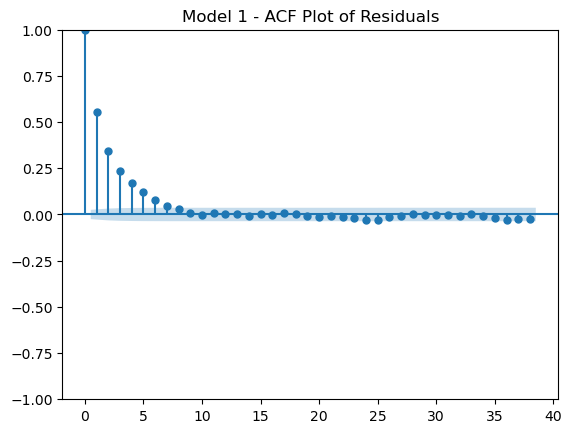

In [72]:
# ACF_Plots_ Autocorrelation test

plot_acf(residuals)
plt.title("Model 1 - ACF Plot of Residuals")
plt.show()

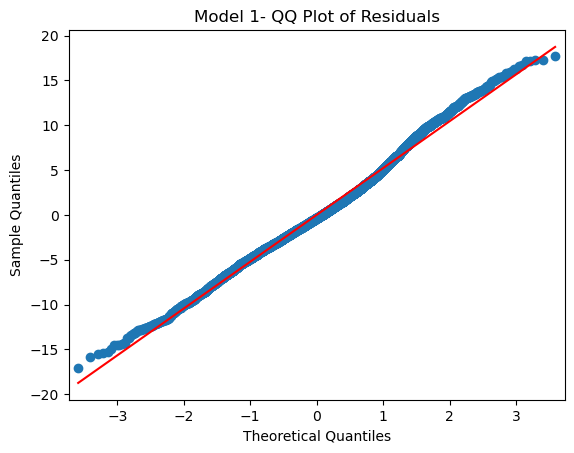

In [73]:
#QQ plots- Normality Test('s' indicates standardized line)
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s') 
plt.title("Model 1- QQ Plot of Residuals")
plt.show()


In [77]:
# Check Omni bus values- Normality test
from scipy.stats import normaltest


statistic, p_value = normaltest(residuals)
print(f"Omnibus test statistic: {statistic}")
print(f"Omnibus test p-value: {p_value}")


Omnibus test statistic: 90.171777631189
Omnibus test p-value: 2.626922592863031e-20


In [80]:
# Proceed with Panel data - Fixed & Random effect but check Hausman test first to choose the model
df1.reset_index(inplace=True)

df1.set_index(['BvDIDnumber','Index1'], inplace= True)
#Set the variables
exog_vars = ['Inventory_turnover','Firm_growth','Financial_leverage','Liquidity','Short_term_financing']
exog = sm.add_constant(df1[exog_vars])
endog = df1['ROA']

# Run Fixed Effects Model
model_fe = PanelOLS(endog, exog, entity_effects=True,)
fe_res = model_fe.fit()
print(fe_res)

# Run Random Effects Model
model_re = RandomEffects(endog, exog)
re_res = model_re.fit()
print("Random Effects Model Summary:")
print(re_res)


# Run Hausman Test

# Obtain the residuals covariance matrix
fe_cov = fe_res.cov
re_cov = re_res.cov

# Obtain the parameters estimated
fe_params = fe_res.params
re_params = re_res.params

# Calculate the difference in coefficients
diff = fe_params - re_params

# Calculate the difference in covariance matrices
cov_diff = fe_cov - re_cov

# Calculate the Hausman test statistic (chi-squared statistic)
chi2_stat = diff.dot(np.linalg.inv(cov_diff)).dot(diff)

# Calculate the degrees of freedom
df = len(fe_params) - 1

# Calculate the p-value
p_value = stats.chi2.sf(chi2_stat, df)

#Print the results of the Hausman Test
print('Hausman Test:')
print('chi-squared statistic:', chi2_stat)
print('degrees of freedom :', df)
print('p-value:', p_value)


                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROA   R-squared:                        0.1189
Estimator:                   PanelOLS   R-squared (Between):              0.1323
No. Observations:                6011   R-squared (Within):               0.1189
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.1252
Time:                        20:32:20   Log-likelihood                -1.679e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      145.92
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(5,5404)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             145.92
                            

In [81]:
# Since Hausman Test confirms, the Fixed effect model is appropriate model, Check Fixed effect tests
df1.reset_index(inplace=True)

df1.set_index(['BvDIDnumber','Index1'], inplace= True)
# Set the variables & define the dependent & independent variables
exog_vars = ['Inventory_turnover','Firm_growth','Financial_leverage','Liquidity','Short_term_financing']
exog = sm.add_constant(df1[exog_vars])
endog = df1['ROA']

# Fixed Effects Model - Entity effect
model_fe = PanelOLS(endog, exog, entity_effects=True,)
fe_res = model_fe.fit()

# Fixed Effects Model- Time effect
model_te = PanelOLS(endog, exog, time_effects=True)
te_res = model_te.fit()


# Fixed Effects Model-Two-way effect
model_twe = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
twe_res = model_twe.fit()

# Print Fixed Effects Model - Entity effect
print("Entity Fixed Effects Model Summary:")
print(fe_res)

# Print Fixed Effects Model- Time effect
print("\nTime Fixed Effects Model Summary:")
print(te_res)

# Print Fixed Effects Model- Two,way effect
print("\nTwo-Way Fixed Effects Model Summary:")
print(twe_res)




Entity Fixed Effects Model Summary:
                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROA   R-squared:                        0.1189
Estimator:                   PanelOLS   R-squared (Between):              0.1323
No. Observations:                6011   R-squared (Within):               0.1189
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.1252
Time:                        20:33:13   Log-likelihood                -1.679e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      145.92
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(5,5404)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):            

In [93]:
# Store the results into dataframe and convert to excel 

# Get the coefficients
fe_coeff = fe_res.params
te_coeff = te_res.params
twe_coeff = twe_res.params

# Get R-squared
fe_r2 = fe_res.rsquared
te_r2 = te_res.rsquared
twe_r2 = twe_res.rsquared

# Calculate Adjusted R-squared directly
fe_adj_r2 = 1 - (1-fe_r2)*(fe_res.nobs-1)/(fe_res.nobs-len(exog_vars)-1)
te_adj_r2 = 1 - (1-te_r2)*(te_res.nobs-1)/(te_res.nobs-len(exog_vars)-1)
twe_adj_r2 = 1 - (1-twe_r2)*(twe_res.nobs-1)/(twe_res.nobs-len(exog_vars)-1)

# Get number of observations
fe_nobs = fe_res.nobs
te_nobs = te_res.nobs
twe_nobs = twe_res.nobs

# Create a DataFrame
df_results = pd.DataFrame({'Entity FE': fe_coeff, 'Time FE': te_coeff, 'Two-Way FE': twe_coeff})

# Append R-squared, Adjusted R-squared, and Number of observations
df_results = df_results.append(pd.Series({'Entity FE': fe_r2, 'Time FE': te_r2, 'Two-Way FE': twe_r2}, name='R-squared'))
df_results = df_results.append(pd.Series({'Entity FE': fe_adj_r2, 'Time FE': te_adj_r2, 'Two-Way FE': twe_adj_r2}, name='Adjusted R-squared'))
df_results = df_results.append(pd.Series({'Entity FE': fe_nobs, 'Time FE': te_nobs, 'Two-Way FE': twe_nobs}, name='Number of Obs.'))

print(df_results)
df_results.to_excel('model-1-fixed_effect.xlsx')

                        Entity FE      Time FE   Two-Way FE
const                    8.489273     4.404036     8.507941
Inventory_turnover       0.032281    -0.003963    -0.001385
Firm_growth              8.001837     9.872961     8.176208
Financial_leverage     -10.070223    -8.316867   -10.234837
Liquidity                0.351442     1.207449     0.606068
Short_term_financing    -4.531258     1.444761    -4.580313
R-squared                0.118949     0.151744     0.124980
Adjusted R-squared       0.118215     0.151037     0.124251
Number of Obs.        6011.000000  6011.000000  6011.000000


/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_63864/3455574942.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_r2, 'Time FE': te_r2, 'Two-Way FE': twe_r2}, name='R-squared'))
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_63864/3455574942.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_adj_r2, 'Time FE': te_adj_r2, 'Two-Way FE': twe_adj_r2}, name='Adjusted R-squared'))
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_63864/3455574942.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_nobs, 'Time FE': te_nob

In [94]:
# Store the residuals of Two-way fixed effect into a variable 
residuals = twe_res.resids



# Run the Breusch-Pagan test-Heteroskedasticity test
bp_test = het_breuschpagan(residuals, exog)
bp_test_result = {'lagrange_multiplier_stat': bp_test[0], 'p-value': bp_test[1], 
                  'f-value': bp_test[2], 'f p-value': bp_test[3]}
print('Breusch-Pagan test:')
print(bp_test_result)

# Run the Durbin-Watson test-Heteroskedasticity test
dw_test_result = durbin_watson(residuals)
print('Durbin-Watson test:')
print(f'DW statistic: {dw_test_result}')

# Run the Breuch- Gofrey test-Serial Correlation test

df1['residuals'] = twe_res.resids
df1['lag_residuals'] = df1.groupby(level='BvDIDnumber')['residuals'].shift(1)

# Drop NaN values from the dataframe
df1_cleaned = df1.dropna(subset=['residuals', 'lag_residuals'])

# Extract the dependent and independent variables from the cleaned dataframe
y = df1_cleaned['residuals']
X = df1_cleaned[['lag_residuals']]

# Using PanelOLS for fixed effect regression
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit()

# Print the Results of the Breuch- Gofrey test
print('Breusch-Godfrey test:')
print(f'F-statistic: {results.f_statistic.stat}')
print(f'p-value: {results.f_statistic.pval}')






Breusch-Pagan test:
{'lagrange_multiplier_stat': 42.40515887805757, 'p-value': 4.8767594217996244e-08, 'f-value': 8.532761423453183, 'f p-value': 4.614775098779772e-08}
Durbin-Watson test:
DW statistic: 1.4750341301551628
Breusch-Godfrey test:
F-statistic: 506.4094416410058
p-value: 1.1102230246251565e-16


In [95]:
# Run Two-Way Fixed Effects Model with robust standard errors
model_twe_robust = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
twe_res_robust = model_twe_robust.fit(cov_type='clustered', cluster_entity=True)

# Print the results of Two-Way Fixed Effects Model with robust standard errors
print('Two-Way Fixed Effects Model:\n', twe_res.summary)
print('Two-Way Fixed Effects Model (Robust):\n', twe_res_robust.summary)


Two-Way Fixed Effects Model:
                           PanelOLS Estimation Summary                           
Dep. Variable:                    ROA   R-squared:                        0.1250
Estimator:                   PanelOLS   R-squared (Between):              0.1287
No. Observations:                6011   R-squared (Within):               0.1178
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.1232
Time:                        20:33:13   Log-likelihood                -1.672e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      154.11
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(5,5395)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             154.1

In [565]:
# Compare Plain Fixed effect two-way Fixed effect two-way with Robust standard error
print('Comparison of coefficient estimates:\n', 
      pd.DataFrame({'Model': twe_res.params, 'Model (Robust)': twe_res_robust.params}))

print('Comparison of standard errors:\n', 
      pd.DataFrame({'Model': twe_res.std_errors, 'Model (Robust)': twe_res_robust.std_errors}))



Comparison of coefficient estimates:
                         Model  Model (Robust)
const               10.340615       10.340615
Inventory_turnover  -0.034755       -0.034755
Firm_growth          5.597623        5.597623
Financial_leverage -10.417141      -10.417141
Capital_intensity   -5.703962       -5.703962
Firm_age_            0.057755        0.057755
Comparison of standard errors:
                        Model  Model (Robust)
const               2.507357        4.379792
Inventory_turnover  0.019400        0.027586
Firm_growth         0.467804        0.647974
Financial_leverage  0.649658        0.982707
Capital_intensity   0.462292        0.743271
Firm_age_           0.071649        0.126202


In [613]:
#Calculate adjusted R2 to test Goodness of the test
twe_r2_robust = twe_res_robust.rsquared
twe_adj_r2_robust = 1 - (1-twe_r2_robust)*(twe_res_robust.nobs-1)/(twe_res_robust.nobs-len(exog_vars)-1)
twe_adj_r2_robust

0.1351626389275541

In [ ]:
# Model 6 : Panel Regression analysis of CCC & ROS

In [96]:


# Import the excel and store in Variable as a CSV format 
excel_file1='Final_For ELI & analysis2.xlsx'
csv_file1='for_eli1.csv'
df1=pd.read_excel(excel_file1)
df1.to_csv(csv_file1, index=False)

In [97]:
#Correlation analysis 
check_corr = ['ROS','Inventory_turnover','log_Tasset','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Asset_tangibility','Firm_age_']
m2_corr=df1[check_corr].corr()
m2_corr.to_excel("m2_corr.xlsx")
m2_corr

,ROS,Inventory_turnover,log_Tasset,Firm_growth,Financial_leverage,Liquidity,Capital_intensity,Short_term_financing,Asset_tangibility,Firm_age_
ROS,1.000000,-0.096270,0.193275,0.160255,-0.193069,0.253281,0.144053,-0.266405,-0.008565,0.033640
Inventory_turnover,-0.096270,1.000000,-0.081808,0.037172,0.043538,-0.172950,-0.148230,0.173778,0.087170,-0.061980
log_Tasset,0.193275,-0.081808,1.000000,-0.027273,0.133518,0.140570,0.470213,-0.286422,0.297310,0.232908
Firm_growth,0.160255,0.037172,-0.027273,1.000000,-0.003047,-0.059102,-0.118030,0.066532,-0.023025,-0.075192
Financial_leverage,-0.193069,0.043538,0.133518,-0.003047,1.000000,-0.268337,0.158809,0.271576,0.245495,-0.090935
Liquidity,0.253281,-0.172950,0.140570,-0.059102,-0.268337,1.000000,0.263287,-0.559486,-0.274720,0.088601
Capital_intensity,0.144053,-0.148230,0.470213,-0.118030,0.158809,0.263287,1.000000,-0.321197,0.236656,0.100756
Short_term_financing,-0.266405,0.173778,-0.286422,0.066532,0.271576,-0.559486,-0.321197,1.000000,-0.300462,-0.181022
Asset_tangibility,-0.008565,0.087170,0.297310,-0.023025,0.245495,-0.274720,0.236656,-0.300462,1.000000,0.043730
Firm_age_,0.033640,-0.061980,0.232908,-0.075192,-0.090935,0.088601,0.100756,-0.181022,0.043730,1.000000


In [98]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Winsorise the data to remove outliers 

# Name a variable to store the columns to be winsorised
cols_to_winsorize = ['ccc','No. of employees','Turnover', 'Average inventory', 'Firmsize', 
                     'log_Tasset', 'ROA', 'ROS','Profit','Inventory_turnover', 
                     'Inventory_to_saleratio', 'Financial_leverage', 'Liquidity', 
                     'Capital_intensity', 'Firm_growth', 'Short_term_financing',
                     'Asset_tangibility', 'Average_fixed_assets','Firm_age_', 
                     'log_fasset']

# Loop the columns to winsorise
for col in cols_to_winsorize:
    df1[col] = winsorize(df1[col], limits=[0.05, 0.05])

# Print the dataframe to check the result
df1

,PrimaryUKSIC2007code,Unique code,Company_name,BvDIDnumber,Index1,ccc,No. of employees,Turnover,Average inventory,Firmsize,...,Financial_leverage,Liquidity,Capital_intensity,Firm_growth,Short_term_financing,Asset_tangibility,Date of incorporation,Firm_age_,Average_fixed_assets,log_fasset
0,11010,21,DIAGEO PLC,GB00023307,1,208.440201,1457,344214.000,38918.0000,351813.000,...,0.460896,1.602492,1.743787,0.083475,0.223516,0.641818,21/10/1886,92,172286.8000,5.236252
1,11010,21,DIAGEO PLC,GB00023307,2,208.440201,1457,344214.000,38918.0000,351813.000,...,0.503933,1.765856,1.743787,-0.196410,0.195028,0.655608,21/10/1886,92,172286.8000,5.236252
2,11010,21,DIAGEO PLC,GB00023307,3,208.440201,1457,344214.000,38918.0000,351813.000,...,0.401169,1.338426,1.581087,0.046766,0.223767,0.700505,21/10/1886,92,172286.8000,5.236252
3,11010,21,DIAGEO PLC,GB00023307,4,208.440201,1457,344214.000,38918.0000,351813.000,...,0.338449,1.366509,1.588623,0.017555,0.214033,0.707521,21/10/1886,92,172286.8000,5.236252
4,11010,21,DIAGEO PLC,GB00023307,5,208.440201,1457,344214.000,38918.0000,351813.000,...,0.319780,1.299099,1.581208,0.158110,0.230865,0.700083,21/10/1886,92,172286.8000,5.236252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,6,65.436737,118,25328.551,2188.6085,10466.801,...,0.049356,1.973843,0.414362,-0.141636,0.401610,0.207285,40256,8,2106.1912,3.323498
6007,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,7,62.883773,118,29507.950,2471.4505,10523.595,...,0.072644,1.811557,0.377385,-0.191525,0.449404,0.185880,40256,8,2106.1912,3.323498
6008,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,8,54.823271,119,36498.267,2715.7990,11748.096,...,0.134726,1.681820,0.330475,0.026884,0.510204,0.141929,40256,8,2106.1912,3.323498
6009,17211,72,SIMPAC (HOLDINGS) LIMITED,GBSC375176,9,58.328332,125,35542.721,2991.3355,12375.407,...,0.190395,1.716791,0.339144,0.032542,0.513190,0.118961,40256,8,2106.1912,3.323498


In [99]:
# Run PooledOLS regression 

df1.set_index(['BvDIDnumber', 'Index1'], inplace=True)
dependent=df1['ROS']
independent=sm.add_constant(df1[['Inventory_turnover','Firm_growth', 'Financial_leverage', 'Liquidity', 'Capital_intensity','Short_term_financing','Firm_age_']])
model=PooledOLS(dependent, independent)
pooledOLS_res=model.fit()

# Print the results of PooledOLS regression
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    ROS   R-squared:                        0.2114
Estimator:                  PooledOLS   R-squared (Between):              0.3325
No. Observations:                6011   R-squared (Within):               0.0600
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.2114
Time:                        20:54:17   Log-likelihood                -1.734e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      229.82
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(7,6003)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             229.82
                            

In [100]:


# Convert the result's summary to a DataFrame
summary_df = pd.DataFrame(pooledOLS_res.summary.tables[1].data)
header = summary_df.iloc[0]
summary_df = summary_df[1:]
summary_df.columns = header

# Extract R2 and F-statistic
r2 = pooledOLS_res.rsquared
f_statistic = pooledOLS_res.f_statistic.stat
f_pvalue = pooledOLS_res.f_statistic.pval

# Calculate adjusted R2
n = len(independent)
k = len(independent.columns) - 1  # Subtracting 1 because of the constant term
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Create a DataFrame for these stats
stats_df = pd.DataFrame({
    'Statistic': ['R-squared', 'Adjusted R-squared', 'F-statistic', 'F-statistic p-value'],
    'Value': [r2, adj_r2, f_statistic, f_pvalue]})

# Write both DataFrames to the same Excel sheet
with pd.ExcelWriter("pooledOLS_results_m2.xlsx") as writer:
    summary_df.to_excel(writer, sheet_name="Results", startrow=1, header=True, index=False)
    stats_df.to_excel(writer, sheet_name="Results", startrow=len(summary_df) + 3, header=True, index=False)


In [101]:
#Lagrangie multiplier model_Heteroskedasticity test
from statsmodels.stats.diagnostic import het_white
residuals = pooledOLS_res.resids
white_test = het_white(residuals, independent)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 1225.8396890600725, 'LM-Test p-value': 7.649530605783121e-235, 'F-Statistic': 43.73277660931837, 'F-Test p-value': 1.3623282118507764e-264}


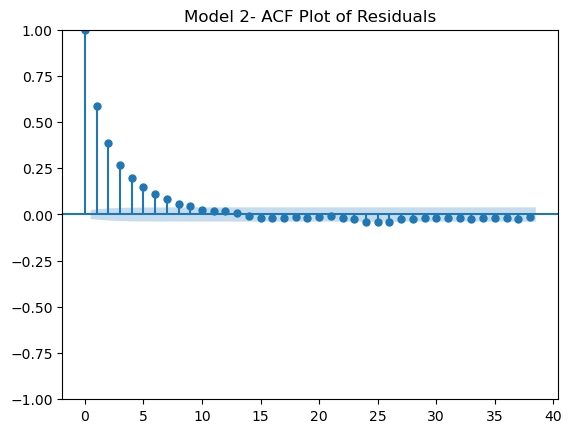

In [102]:

# ACF_Plots_ Autocorrelation test

plot_acf(residuals)
plt.title("Model 2- ACF Plot of Residuals")
plt.show()

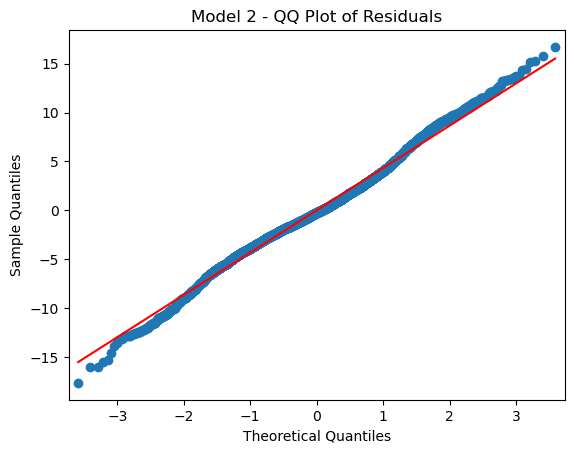

In [103]:
from statsmodels.graphics.gofplots import qqplot

#QQ plots- Normality Test' (s' indicates standardized line)
qqplot(residuals, line='s')
plt.title("Model 2 - QQ Plot of Residuals")
plt.show()

In [104]:
from scipy.stats import normaltest
#Run Omnibust test-Normality test

statistic, p_value = normaltest(residuals)
print(f"Omnibus test statistic: {statistic}")
print(f"Omnibus test p-value: {p_value}")

Omnibus test statistic: 75.31027949215816
Omnibus test p-value: 4.431804488293235e-17


In [105]:
# Proceed with Panel data - Fixed & Random effect but check Hausman test first to choose the model
df1.reset_index(inplace=True)

df1.set_index(['BvDIDnumber','Index1'], inplace= True)

#Store the variables & define dependent and inpendent variables

exog_vars = ['Inventory_turnover','Firm_growth','Financial_leverage','Liquidity','Short_term_financing']
exog = sm.add_constant(df1[exog_vars])
endog = df1['ROS']

# Run Fixed Effects Model
model_fe = PanelOLS(endog, exog, entity_effects=True,)
fe_res = model_fe.fit()
print(fe_res)

# Run Random Effects Model
model_re = RandomEffects(endog, exog)
re_res = model_re.fit()
print("Random Effects Model Summary:")
print(re_res)


# Run Hausman Test

# Obtain the residuals covariance matrix
fe_cov = fe_res.cov
re_cov = re_res.cov

# Obtain the parameters estimated
fe_params = fe_res.params
re_params = re_res.params

# Calculate the difference in coefficients
diff = fe_params - re_params

# Calculate the difference in covariance matrices
cov_diff = fe_cov - re_cov

# Calculate the Hausman test statistic (chi-squared statistic)
chi2_stat = diff.dot(np.linalg.inv(cov_diff)).dot(diff)

# Calculate the degrees of freedom
df = len(fe_params) - 1

# Calculate the p-value
p_value = stats.chi2.sf(chi2_stat, df)

#Print the Hausman test results
print('Hausman Test:')
print('chi-squared statistic:', chi2_stat)
print('degrees of freedom :', df)
print('p-value:', p_value)


                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROS   R-squared:                        0.1118
Estimator:                   PanelOLS   R-squared (Between):              0.1809
No. Observations:                6011   R-squared (Within):               0.1118
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.1505
Time:                        20:54:20   Log-likelihood                -1.528e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      136.07
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(5,5404)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             136.07
                            

In [106]:

df1.reset_index(inplace=True)

df1.set_index(['BvDIDnumber','Index1'], inplace= True)
#Store the variables & define dependent and inpendent variables

exog_vars = ['Inventory_turnover','Firm_growth','Financial_leverage','Liquidity','Short_term_financing']
exog = sm.add_constant(df1[exog_vars])
endog = df1['ROS']

# Run Fixed Effects Model-Entity effect
model_fe = PanelOLS(endog, exog, entity_effects=True,)
fe_res = model_fe.fit()

# Run Fixed Effects Model-Time effect
model_te = PanelOLS(endog, exog, time_effects=True)
te_res = model_te.fit()


# Run Fixed Effects Model - Two-way effect
model_twe = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
twe_res = model_twe.fit()

# Print the Fixed Effects Model-Entity effect
print("Entity Fixed Effects Model Summary:")
print(fe_res)

# Print the Fixed Effects Model-Time effect
print("\nTime Fixed Effects Model Summary:")
print(te_res)

# Print the Fixed Effects Model-Twoway effect
print("\nTwo-Way Fixed Effects Model Summary:")
print(twe_res)

Entity Fixed Effects Model Summary:
                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROS   R-squared:                        0.1118
Estimator:                   PanelOLS   R-squared (Between):              0.1809
No. Observations:                6011   R-squared (Within):               0.1118
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.1505
Time:                        20:54:29   Log-likelihood                -1.528e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      136.07
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(5,5404)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):            

In [107]:
# Store the above results to dataframe and then convert to excel 

# Get the coefficients
fe_coeff = fe_res.params
te_coeff = te_res.params
twe_coeff = twe_res.params

# Get R-squared
fe_r2 = fe_res.rsquared
te_r2 = te_res.rsquared
twe_r2 = twe_res.rsquared

# Calculate Adjusted R-squared directly
fe_adj_r2 = 1 - (1-fe_r2)*(fe_res.nobs-1)/(fe_res.nobs-len(exog_vars)-1)
te_adj_r2 = 1 - (1-te_r2)*(te_res.nobs-1)/(te_res.nobs-len(exog_vars)-1)
twe_adj_r2 = 1 - (1-twe_r2)*(twe_res.nobs-1)/(twe_res.nobs-len(exog_vars)-1)

# Get number of observations
fe_nobs = fe_res.nobs
te_nobs = te_res.nobs
twe_nobs = twe_res.nobs

# Create a DataFrame
df_results = pd.DataFrame({'Entity FE': fe_coeff, 'Time FE': te_coeff, 'Two-Way FE': twe_coeff})

# Append R-squared, Adjusted R-squared, and Number of observations
df_results = df_results.append(pd.Series({'Entity FE': fe_r2, 'Time FE': te_r2, 'Two-Way FE': twe_r2}, name='R-squared'))
df_results = df_results.append(pd.Series({'Entity FE': fe_adj_r2, 'Time FE': te_adj_r2, 'Two-Way FE': twe_adj_r2}, name='Adjusted R-squared'))
df_results = df_results.append(pd.Series({'Entity FE': fe_nobs, 'Time FE': te_nobs, 'Two-Way FE': twe_nobs}, name='Number of Obs.'))

#Print the results
print(df_results)
df_results.to_excel('model-2-fixed_effect.xlsx')

                        Entity FE      Time FE   Two-Way FE
const                    7.431242     7.533962     7.405426
Inventory_turnover      -0.002558    -0.039036    -0.021803
Firm_growth              6.680463     8.493249     6.831383
Financial_leverage      -5.645186    -2.466065    -5.714312
Liquidity                0.394716     0.623856     0.550072
Short_term_financing    -4.497737    -6.791551    -4.499757
R-squared                0.111821     0.177841     0.117082
Adjusted R-squared       0.111082     0.177156     0.116347
Number of Obs.        6011.000000  6011.000000  6011.000000


/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_63864/3063251994.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_r2, 'Time FE': te_r2, 'Two-Way FE': twe_r2}, name='R-squared'))
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_63864/3063251994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_adj_r2, 'Time FE': te_adj_r2, 'Two-Way FE': twe_adj_r2}, name='Adjusted R-squared'))
/var/folders/bg/8wt9vs595gg7k7s8_yr_pl_w0000gn/T/ipykernel_63864/3063251994.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.Series({'Entity FE': fe_nobs, 'Time FE': te_nob

In [108]:
# Store the residuals of Two-way fixed effect into a variable 
residuals = twe_res.resids



# Run the Breusch-Pagan test-Heteroskedasticity test
bp_test = het_breuschpagan(residuals, exog)
bp_test_result = {'lagrange_multiplier_stat': bp_test[0], 'p-value': bp_test[1], 
                  'f-value': bp_test[2], 'f p-value': bp_test[3]}
print('Breusch-Pagan test:')
print(bp_test_result)

# Run the Durbin-Watson test-Heteroskedasticity test
dw_test_result = durbin_watson(residuals)
print('Durbin-Watson test:')
print(f'DW statistic: {dw_test_result}')

# Run the Breuch- Gofrey test-Serial correlation test
# Create a column in df1 of Two-way effect residuals
df1['residuals'] = twe_res.resids
df1['lag_residuals'] = df1.groupby(level='BvDIDnumber')['residuals'].shift(1)

# Drop NaN values from the dataframe
df1_cleaned = df1.dropna(subset=['residuals', 'lag_residuals'])

# Extract the dependent and independent variables from the cleaned dataframe
y = df1_cleaned['residuals']
X = df1_cleaned[['lag_residuals']]

# Using PanelOLS for fixed effect regression
model = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit()

#Print the results of Breuch- Gofrey test
print('Breusch-Godfrey test:')
print(f'F-statistic: {results.f_statistic.stat}')
print(f'p-value: {results.f_statistic.pval}')




Breusch-Pagan test:
{'lagrange_multiplier_stat': 147.21769075642726, 'p-value': 5.219910303092142e-30, 'f-value': 30.15262799230298, 'f p-value': 2.245949595654117e-30}
Durbin-Watson test:
DW statistic: 1.4608530041518084
Breusch-Godfrey test:
F-statistic: 589.263178429351
p-value: 1.1102230246251565e-16


In [109]:
# Two-Way Fixed Effects Model with robust standard errors
model_twe_robust = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
twe_res_robust = model_twe_robust.fit(cov_type='clustered', cluster_entity=True)

# Print the Summary of Two-way fixed effect plain & Two-way fixed effect robust
print('Two-Way Fixed Effects Model:\n', twe_res.summary)
print('Two-Way Fixed Effects Model (Robust):\n', twe_res_robust.summary)


Two-Way Fixed Effects Model:
                           PanelOLS Estimation Summary                           
Dep. Variable:                    ROS   R-squared:                        0.1171
Estimator:                   PanelOLS   R-squared (Between):              0.1935
No. Observations:                6011   R-squared (Within):               0.1112
Date:                Sun, Aug 27 2023   R-squared (Overall):              0.1575
Time:                        20:54:29   Log-likelihood                 -1.52e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      143.08
Entities:                         602   P-value                           0.0000
Avg Obs:                       9.9850   Distribution:                  F(5,5395)
Min Obs:                       1.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             143.0

In [110]:
#Compare results of Plain Fixed effect two way & Robust standard fixed effect two way

print('Comparison of coefficient estimates:\n', 
      pd.DataFrame({'Model': twe_res.params, 'Model (Robust)': twe_res_robust.params}))

print('Comparison of standard errors:\n', 
      pd.DataFrame({'Model': twe_res.std_errors, 'Model (Robust)': twe_res_robust.std_errors}))

Comparison of coefficient estimates:
                          Model  Model (Robust)
const                 7.405426        7.405426
Inventory_turnover   -0.021803       -0.021803
Firm_growth           6.831383        6.831383
Financial_leverage   -5.714312       -5.714312
Liquidity             0.550072        0.550072
Short_term_financing -4.499757       -4.499757
Comparison of standard errors:
                          Model  Model (Robust)
const                 0.607241        1.073217
Inventory_turnover    0.015015        0.020090
Firm_growth           0.341550        0.484759
Financial_leverage    0.522238        0.805240
Liquidity             0.166190        0.300452
Short_term_financing  0.786458        1.384300


In [111]:
# Get adjusted R2
twe_r2_robust = twe_res_robust.rsquared
twe_adj_r2_robust = 1 - (1-twe_r2_robust)*(twe_res_robust.nobs-1)/(twe_res_robust.nobs-len(exog_vars)-1)

In [112]:
twe_adj_r2_robust

0.11634693578550648